# Repaso - Módulo 2
---


## Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [3]:
import numpy as np
import pandas as pd
def montecarlo1(f, a, b, n):
  u = np.random.uniform(a, b, n)
  return (b-a)/float(n) * np.sum(f(u))

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [5]:
tabla=pd.DataFrame(columns=['10',"100","1000", '10000', "100000"])

def f1(x):
  return np.sqrt(1+x**4)
u=montecarlo1(f1, 4, 5, 10)
u1=montecarlo1(f1, 4, 5, 100)
u2=montecarlo1(f1, 4, 5, 1000)
u3=montecarlo1(f1, 4, 5, 10000)
u4=montecarlo1(f1, 4, 5, 100000)
tabla.loc["f1"]=[u, u1, u2, u3, u4]
tabla



,10,100,1000,10000,100000
f1,20.974664,20.892438,20.494338,20.356479,20.372035


In [6]:
def f2(x):
  return np.log(np.log(x))
u=montecarlo1(f2, 4, 5, 10)
u1=montecarlo1(f2, 4, 5, 100)
u2=montecarlo1(f2, 4, 5, 1000)
u3=montecarlo1(f2, 4, 5, 10000)
u4=montecarlo1(f2, 4, 5, 100000)
tabla.loc["f2"]=[u, u1, u2, u3, u4]
tabla



,10,100,1000,10000,100000
f1,20.974664,20.892438,20.494338,20.356479,20.372035
f2,0.406303,0.408994,0.404337,0.406236,0.405973


In [7]:
def f3(x):
  return 1/np.log(x)
u=montecarlo1(f3, 4, 5, 10)
u1=montecarlo1(f3, 4, 5, 100)
u2=montecarlo1(f3, 4, 5, 1000)
u3=montecarlo1(f3, 4, 5, 10000)
u4=montecarlo1(f3, 4, 5, 100000)
tabla.loc["f3"]=[u, u1, u2, u3, u4]
tabla

,10,100,1000,10000,100000
f1,20.974664,20.892438,20.494338,20.356479,20.372035
f2,0.406303,0.408994,0.404337,0.406236,0.405973
f3,0.668490,0.667559,0.667575,0.666763,0.666785


In [8]:
def f4(x):
  return np.exp(-(x**2)/2)
u=montecarlo1(f4, 4, 5, 10)
u1=montecarlo1(f4, 4, 5, 100)
u2=montecarlo1(f4, 4, 5, 1000)
u3=montecarlo1(f4, 4, 5, 10000)
u4=montecarlo1(f4, 4, 5, 100000)
tabla.loc["f4"]=[u, u1, u2, u3, u4]
tabla

,10,100,1000,10000,100000
f1,20.974664,20.892438,20.494338,20.356479,20.372035
f2,0.406303,0.408994,0.404337,0.406236,0.405973
f3,0.668490,0.667559,0.667575,0.666763,0.666785
f4,0.000085,0.000072,0.000079,0.000079,0.000078


## Montecarlo Tipo 2
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

[A ~ 4.4]

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

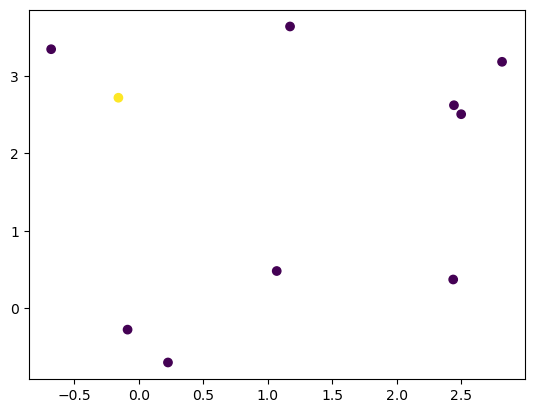

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def region(x, y):
  return x**2 + 2*y**2 <= -2*x + 8*y - 7

def montecarlo_tipo2(f, ax, bx, ay, by, n):
  x = np.random.uniform(ax, bx, n)
  y = np.random.uniform(ay, by, n)
  AR=(bx-ax)*(by-ay)
  return np.mean(f(x, y))*AR
#defino con el fin de encontrar los valores
ax=-.9
bx=3.8
ay=-.9
by=3.8
n=10
x=np.random.uniform(ax, bx, n)
y=np.random.uniform(ay, by, n)
plt.figure()
plt.scatter(x, y, c=region(x, y))# los puntos no tienen que tocar el borde

In [11]:
AD=montecarlo_tipo2(region, ax, bx, ay, by, 10) #aproximación
AD

AR=(bx-ax)*(by-ay) #area
Crel=np.sqrt((1-AD/AR)/(AD/AR)) #Convergencia
Erel=np.log10(Crel)-np.log10(10) #Error
Erel
tabla=pd.DataFrame(columns=['Aproximación',"Area","Convergencia", 'Error']) #nombre de las columenas
tabla.loc["10"]=[AD, AR, Crel, Erel] #[10]=nombre vertical
tabla


,Aproximación,Area,Convergencia,Error
10,2.209,22.09,3.0,-0.522879


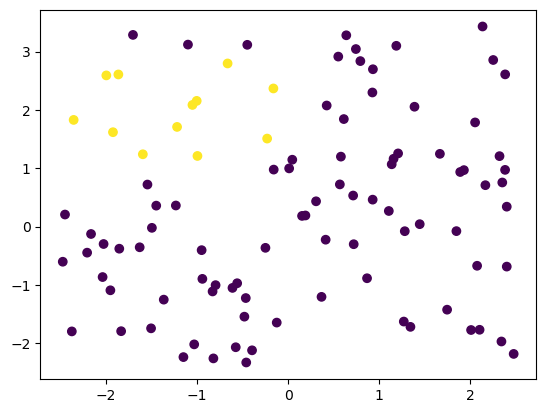

In [12]:
ax2=-2.5
bx2=2.5
ay2=-2.5
by2=3.5
n2=100
x2=np.random.uniform(ax2, bx2, n2)
y2=np.random.uniform(ay2, by2, n2)
plt.figure()
plt.scatter(x2, y2, c=region(x2, y2))# los puntos no tienen que tocar el borde


In [13]:
AD2=montecarlo_tipo2(region, ax2, bx2, ay2, by2, 100)
AR2=(bx2-ax2)*(by2-ay2)
Crel2=np.sqrt((1-AD2/AR2)/(AD2/AR2))
Erel2=np.log10(Crel2)-np.log10(n2)
tabla.loc["100"]=[AD2, AR2, Crel2, Erel2]
tabla

,Aproximación,Area,Convergencia,Error
10,2.209,22.09,3.000000,-0.522879
100,3.900,30.00,2.586949,-1.587212


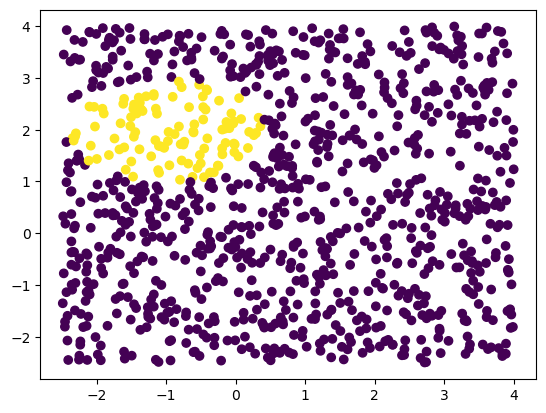

In [14]:
ax3=-2.5
bx3=4
ay3=-2.5
by3=4
n3=1000
x3=np.random.uniform(ax3, bx3, n3)
y3=np.random.uniform(ay3, by3, n3)
plt.figure()
plt.scatter(x3, y3, c=region(x3, y3))

In [15]:
AD3=montecarlo_tipo2(region, ax3, bx3, ay3, by3, 1000)
AR3=(bx3-ax3)*(by3-ay3)
Crel3=np.sqrt((1-AD3/AR3)/(AD3/AR3))
Erel3=np.log10(Crel3)-np.log10(n3)
tabla.loc["1000"]=[AD3, AR3, Crel3, Erel3]
tabla

,Aproximación,Area,Convergencia,Error
10,2.2090,22.09,3.000000,-0.522879
100,3.9000,30.00,2.586949,-1.587212
1000,4.4785,42.25,2.904128,-2.536984


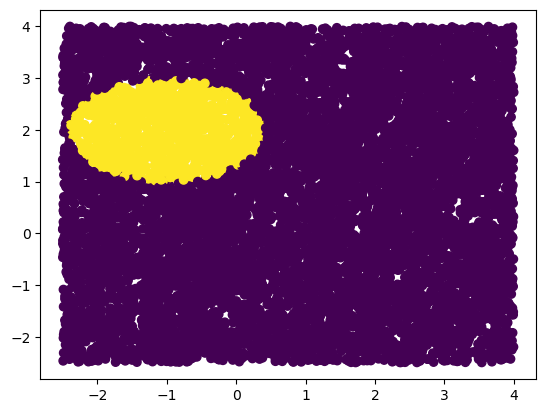

In [16]:
ax4=-2.5
bx4=4
ay4=-2.5
by4=4
n4=10000
x4=np.random.uniform(ax4, bx4, n4)
y4=np.random.uniform(ay4, by4, n4)
plt.figure()
plt.scatter(x4, y4, c=region(x4, y4))

In [17]:
AD4=montecarlo_tipo2(region, ax4, bx4, ay4, by4, 10000)
AR4=(bx4-ax4)*(by4-ay4)
Crel4=np.sqrt((1-AD4/AR4)/(AD4/AR4))
Erel4=np.log10(Crel4)-np.log10(n4)
tabla.loc["10000"]=[AD4, AR4, Crel4, Erel4]
tabla

,Aproximación,Area,Convergencia,Error
10,2.20900,22.09,3.000000,-0.522879
100,3.90000,30.00,2.586949,-1.587212
1000,4.47850,42.25,2.904128,-2.536984
10000,4.50385,42.25,2.894972,-3.538356


---
## Caminata aleatoria

1. Lee el archivo `MSFT_2023.csv` en un DataFrame de pandas.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('MSFT_2023.csv') #jalar los datos a python
df

,Date,Adj Close
0,2023-01-03,236.183548
1,2023-01-04,225.852112
2,2023-01-05,219.158340
3,2023-01-06,221.741211
4,2023-01-09,223.900162
...,...,...
245,2023-12-22,372.543915
246,2023-12-26,372.623505
247,2023-12-27,372.036713
248,2023-12-28,373.240112


El archivo contiene los datos de precio de cierre de la acción de Microsoft para el usuario promedio (no fines de semana ni dias feriados). El precio de una acción se considera una caminata aleatoria.

2. Grafica la columna `Adj Close` (plot)

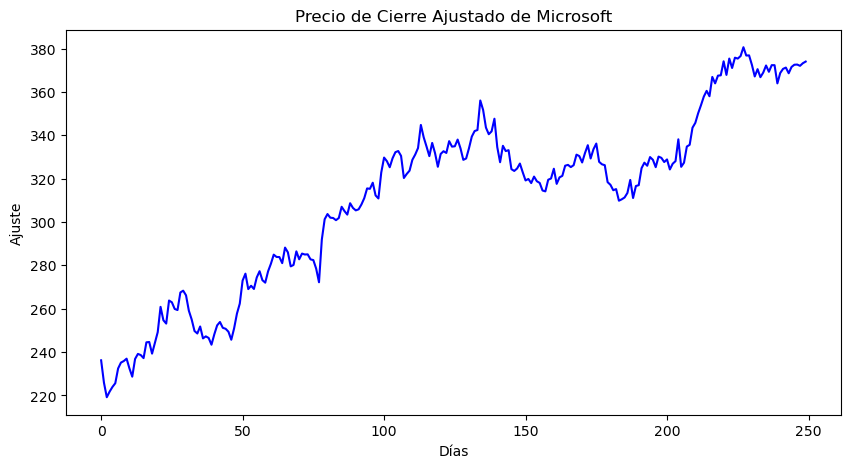

In [21]:
plt.figure(figsize=(10, 5))  # Tamaño de la gráfica
plt.plot(df["Adj Close"], color='blue')  # Graficar 'Adj Close' con color azul
plt.xlabel("Días")  # Etiqueta del eje X
plt.ylabel("Ajuste")  # Etiqueta del eje Y
plt.title("Precio de Cierre Ajustado de Microsoft")  # Título de la gráfica
plt.show()

3. Realiza un histograma de los datos.

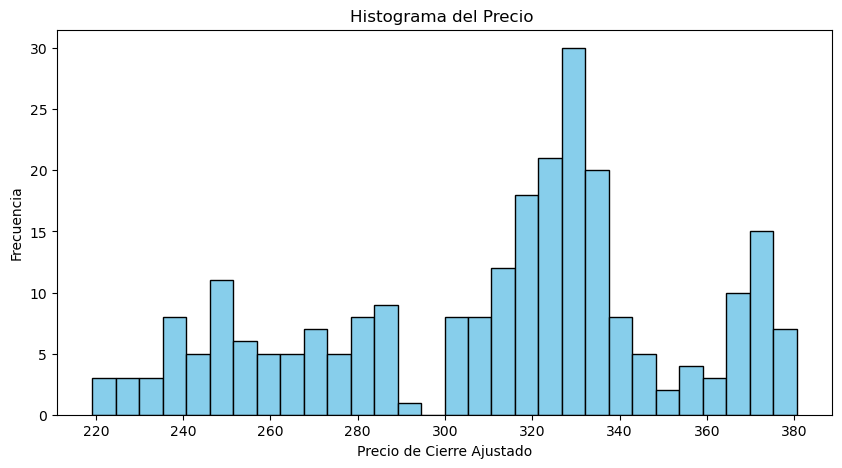

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))  # Tamaño de la gráfica
plt.hist(df["Adj Close"], bins=30, color='skyblue', edgecolor='black')  # Crear el histograma
plt.xlabel("Precio de Cierre Ajustado")
plt.ylabel("Frecuencia")
plt.title("Histograma del Precio ")
plt.show()



Los datos de acciones se comportan como variables aleatorias, sin una distribución que pueda describirlos con certeza.

4. Aplica el teorema del límite central y agrupa los datos calculando su rendimiento:

$$ R = \frac{x_{i+1} - x_i}{x_i} $$

En otras palabras, calcula el cambio porcentual entre los días.

In [25]:
ajuste = df["Adj Close"]
r = []

for i in range(len(ajuste)-1): # le colocas -1 para que inice en el rango
    rendimiento = (ajuste[i+1] - ajuste[i]) / ajuste[i]
    r.append(rendimiento)
r


[-0.043743250729639936,
 -0.02963785155015944,
 0.011785408111991707,
 0.00973635345697022,
 0.00761712202544966,
 0.030238160344628996,
 0.011621500027802632,
 0.0030187429823651728,
 0.004681639277037762,
 -0.018889097111268672,
 -0.016453937671624234,
 0.03574352588179066,
 0.009824372895883083,
 -0.002226086921011943,
 -0.005908058190539433,
 0.030713597990462443,
 0.0006452170988897248,
 -0.021961781971167584,
 0.021012844927873708,
 0.01993455563030645,
 0.04688428157416233,
 -0.023620431906708563,
 -0.006116038292520303,
 0.04202207797366864,
 -0.0031018923625995318,
 -0.011659759797156576,
 -0.0019725600666147085,
 0.031242826394842993,
 0.0031328394435188116,
 -0.007992919952170323,
 -0.026622617438206545,
 -0.015601749018588719,
 -0.020886648720269393,
 -0.004590863222828643,
 0.012961584247105461,
 -0.021784268323959542,
 0.003771792286829546,
 -0.002958177066740005,
 -0.012629207651856288,
 0.01965312142568215,
 0.016646135731666265,
 0.006189064536518081,
 -0.0105890169610

5. Realiza un histograma de los rendimientos calculados.

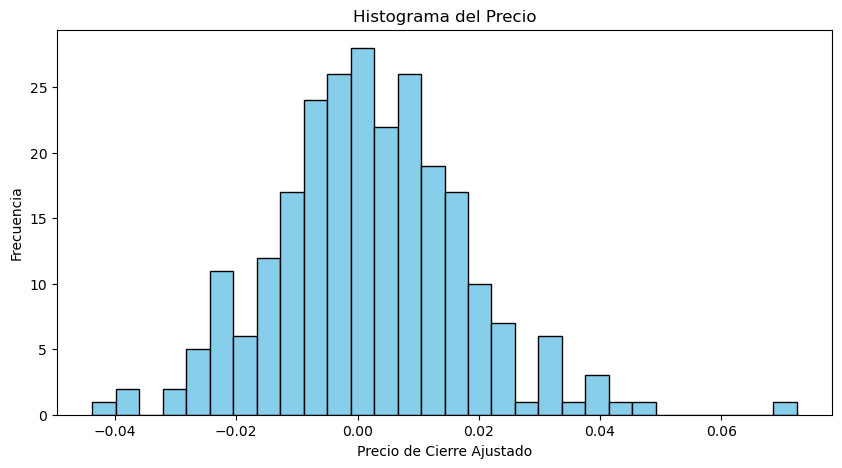

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))  # Tamaño de la gráfica
plt.hist(r, bins=30, color='skyblue', edgecolor='black')  # Crear el histograma
plt.xlabel("Precio de Cierre Ajustado")
plt.ylabel("Frecuencia")
plt.title("Histograma del Precio")
plt.show()


Los rendimientos, al ser una agrupación de una distribución (por teorema del límite central) se parecen un poco más a una distribución normal. Idealmente se haría una prueba de hipótesis para comprobar que sí son normales los datos, pero por el momento asumamos que sí lo son.

6. Extrae la media y la desviación estándar de los rendimientos.

In [29]:
media=np.mean(r)
media

0.001971659969002934

In [30]:
std=np.std(r)

7. Simula 30 días de rendimientos (toma muestras aleatorias de una distribución normal con las características extraídas) 10,000 veces. Suma un 1 a todos los valores para considerar el 100\% inicial. (30 renglones, 10000 columnas)

In [82]:
dias=30
n=10000
rendimiento=np.random.normal(media, std, (dias, n))
rendimiento+1


array([[1.01275881, 0.96224724, 1.00190993, ..., 0.98264995, 1.01784196,
        0.99669429],
       [0.98641384, 1.00385534, 0.98597126, ..., 1.01304168, 1.00298195,
        0.99904756],
       [1.01520607, 1.01490727, 0.98927899, ..., 0.99687743, 0.98621503,
        1.02319329],
       ...,
       [0.99859997, 1.01193975, 0.98090034, ..., 1.02168939, 1.02283   ,
        0.96861676],
       [1.03148585, 1.01314593, 0.99326779, ..., 1.00881669, 1.01637775,
        1.00950966],
       [0.98061709, 0.97838631, 1.0261567 , ..., 1.01524985, 1.01114639,
        0.9894143 ]])

Si se empieza con el 100\% del precio de la acción, el precio de ésta cambiaría día con día dados los rendimientos simulados:

$$ c_1 = c_{0}r_1 $$

Y al día siguiente:

$$ c_{2} = c_1 r_{2} = c_{0} r_1 r_{2} $$

Pasado mañana:

$$ c_{3} = c_{2} r_{3} = c_{0} r_1 r_{2} r_3 $$

Suponiendo un día 9:

$$ c_9 = c_8 r_9 = c_0 r_1 r_2 r_3 r_4 r_5 r_6 r_7 r_8 r_9 $$

Por lo que tenemos que acumular el producto de los rendimientos.

8. Utiliza el comando `cumprod` sobre las columnas de la matriz de `numpy` que contiene las simulaciones de los rendimientos. `obj.cumprod(axis=0)`

In [35]:
rendimiento1=np.array(rendimiento+1) #Primero hay que hacerlo array
rendimiento1

array([[1.02014815, 1.00930835, 1.00266541, ..., 1.0155262 , 1.00828655,
        1.00714404],
       [1.01573475, 0.96710094, 0.9669696 , ..., 1.01354706, 1.00735667,
        0.9823595 ],
       [0.99954366, 1.00241855, 0.99355206, ..., 1.01494461, 0.98912742,
        1.01193665],
       ...,
       [0.99230726, 0.97276635, 1.01229602, ..., 1.00221891, 0.98639948,
        0.96609973],
       [1.01003677, 0.9703661 , 1.01995779, ..., 0.99374399, 1.02353939,
        1.00836683],
       [1.0140592 , 1.00897997, 1.00926495, ..., 0.98548614, 0.98734509,
        0.9916452 ]])

In [36]:
r=rendimiento1.cumprod(axis=0) #esto acomula los datosy los va multiplicando por como van avasando
r

array([[1.02014815, 1.00930835, 1.00266541, ..., 1.0155262 , 1.00828655,
        1.00714404],
       [1.03619992, 0.97610305, 0.96954697, ..., 1.0292836 , 1.01570418,
        0.98937752],
       [1.03572706, 0.97846381, 0.96329539, ..., 1.04466584, 1.00466085,
        1.00118738],
       ...,
       [1.02686196, 0.92463618, 0.96040654, ..., 1.06369419, 1.13067887,
        0.99973618],
       [1.03716835, 0.8972356 , 0.97957413, ..., 1.0570397 , 1.15729437,
        1.00810081],
       [1.05175011, 0.90529275, 0.98864983, ..., 1.04169798, 1.14264892,
        0.99967833]])

9. Multiplica el precio de la acción del último día registrado en los datos iniciales de Microsoft por la matriz de rendimientos acumulados.

In [38]:
ultimo=df["Adj Close"].iloc[-1] #.iloc permite encontrar valores de lista de forma directa
acomulado=r*ultimo
acomulado

array([[381.53129752, 377.47725735, 374.9928255 , ..., 379.80270896,
        377.09510779, 376.66781467],
       [387.53459691, 365.05861036, 362.60666246, ..., 384.94791988,
        379.86927078, 370.02320662],
       [387.3577487 , 365.94152361, 360.26859585, ..., 390.70081605,
        375.73911105, 374.44004574],
       ...,
       [384.04223805, 345.81020731, 359.18817557, ..., 397.81734061,
        422.86934283, 373.89730409],
       [387.89678334, 335.56250056, 366.35677899, ..., 395.32858997,
        432.8234309 , 377.02564069],
       [393.3503025 , 338.57584011, 369.75105536, ..., 389.59084707,
        427.34609139, 373.87566868]])

Ahora tienes 10,000 simulaciones conservadoras (mientras se mantenga la misma tendencia en rendimientos) de precios de las acciones de Microsoft de un mes.

10. En promedio, ¿cuánto valen las acciones de Microsoft en el día 30? [~397]

In [40]:
treinta=acomulado[29]
np.mean(treinta)

396.71431788508306

11. ¿Cuál es la probabilidad de que el precio exceda 400? [~44\%]

$P(excede)=\frac{mayor a 400}{todo lo que es hasta 30}$

In [43]:
excede=np.sum(treinta>=400)
(excede/len(treinta))*100

44.57

## Probabilidad

Tienes una baraja de 50 cartas de 5 colores (10 cartas de cada color) con números del 1 al 10 (5 cartas de cada número). ¿Cuál es la probabilidad de que al tomar dos cartas al azar (sin reemplazo) las cartas no sean ni del mismo número ni del mismo color? [36/49]



**Datos**

50 cartas
5 colores de cada carta es decir 10 cartas
1 al 10
saco 2 cartas y es sin remplazo





In [46]:
colores=5
numero_cartas=10
cartas_color=10

# convertir en areglo esto
baraja=[]
for i in range(colores):
    for j in range(numero_cartas):
        baraja.append((i, j))
baraja=np.array(baraja)
baraja



array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 7],
       [0, 8],
       [0, 9],
       [1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7],
       [1, 8],
       [1, 9],
       [2, 0],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [2, 8],
       [2, 9],
       [3, 0],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [3, 7],
       [3, 8],
       [3, 9],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [4, 7],
       [4, 8],
       [4, 9]])

In [47]:
n=10000
exitos=0

for i in range(n):
    agarro=np.random.choice(len(baraja), 2, replace=False)
    carta1=baraja[agarro[0]] #baraja[agarro[0]] esto quiere decir que estoy agarrando 1 carta y la separo
    carta2=baraja[agarro[1]]
    if carta1[0]!=carta2[0] and carta2[1]!=carta1[1]:
        exitos+=1
exitos/n


0.7426

In [48]:
36/49

0.7346938775510204